# Gaussian Processes

George Ho 9/27/17

The aim of this project was to reproduce Figure 3.8 in Bishop's _Pattern Recognition and Machine Learning_ (PRML), but using a Gaussian process to perform the linear regression instead of a simple Bayesian regression.

Bishop gives a very incomplete treatment of Gaussian processes in his book. For further reference, consult Duvenaud's ["kernel cookbook"](http://www.cs.toronto.edu/~duvenaud/cookbook/) or Rasmussen's [_Gaussian Processes for Machine Learning_ (GPML)](http://www.gaussianprocess.org/gpml/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from random import shuffle

In [2]:
num_obs = 20    # Number of observations
beta = 25       # Precision (known)
alpha = 2       # Hyperparameter

## Gaussian Process Regression (PRML Figure 3.8)

In [3]:
# s parameter of Gaussian kernel
s = 0.5

In [4]:
def gaussian_kernel(x1, x2):
    '''
    Given two vectors of observations, returns the vector of Gaussian
    kernel values
    Alternatively, given two float observations, returns the Gaussian
    kernel value
    '''
    k = np.exp(-np.abs(x1-x2)**2 / (2*s**2))
    if type(x1) != np.ndarray:
        return k
    return k.reshape([len(k), 1])

In [5]:
def gp_covariance(x):
    '''
    Given a list of observations, returns the covariance matrix C of the
    Gaussian process
    '''
    # Construct covariance matrix from kernel
    C = np.zeros([len(x), len(x)])
    for i in range(len(x)):
        for j in range(len(x)):
            C[i, j] = gaussian_kernel(x[i], x[j])
            if i == j:
                C[i, j] += 1/beta

    return C

In [6]:
def plot_ground_truth(ax=None):
    '''
    Given an axes, plots sin(2*pi*x)
    '''
    if ax is None:
        ax = plt.gca()

    x = np.linspace(0, 1)
    t = np.sin(2*np.pi*x)
    ax.plot(x, t, color='green')
    
    return ax

In [7]:
def plot_predictive_mean(x, C, t, ax=None):
    '''
    Given the covariance matrix of the Gaussian process and the vector of
    targets, plots the predictive mean as a function of observation
    '''
    if ax is None:
        ax = plt.gca()

    obs = np.linspace(0, 1)

    k_list = []
    for i in range(len(obs)):
        k = gaussian_kernel(np.repeat(obs[i], len(x)), x)
        k_list.append(k)

    predictive_mean = list(map(lambda k: k.T @ np.linalg.inv(C) @ t, k_list))
    predictive_mean = np.concatenate(predictive_mean)

    ax.plot(obs, predictive_mean, color='red')

    return ax, predictive_mean

In [8]:
def plot_predictive_stdev(x, C, predictive_mean, ax=None):
    '''
    Given the predictive mean as a function of observation,
    shades in 1 standard deviation above and below the
    predictive mean
    '''
    obs = np.linspace(0, 1)
    
    k_list = []
    for i in range(len(obs)):
        k = gaussian_kernel(np.repeat(obs[i], len(x)), x)
        k_list.append(k)

    c = gaussian_kernel(obs, obs) + 1/beta
    kCk = list(map(lambda k: (k.T @ np.linalg.inv(C) @ k).flatten(), k_list))
        
    stdev = np.sqrt(c - kCk).flatten()

    upper = predictive_mean + stdev
    lower = predictive_mean - stdev

    ax.fill_between(obs,
                    upper.squeeze(),
                    lower.squeeze(),
                    facecolor='red',
                    alpha=0.3,
                    interpolate=True)
    
    return ax

In [9]:
def plot_data(num, ax=None):
    '''
    Given a number of data points to plot and an axes, plots
    the appropriate number of data points
    '''
    if ax is None:
        ax = plt.gca()

    ax.scatter(x[:num], t[:num])

    return ax

In [10]:
# Generate observations and labels
x = np.linspace(0, 1, num_obs)
shuffle(x)
t = np.sin(2*np.pi*x) + np.random.normal(0, np.sqrt(1/beta), num_obs)

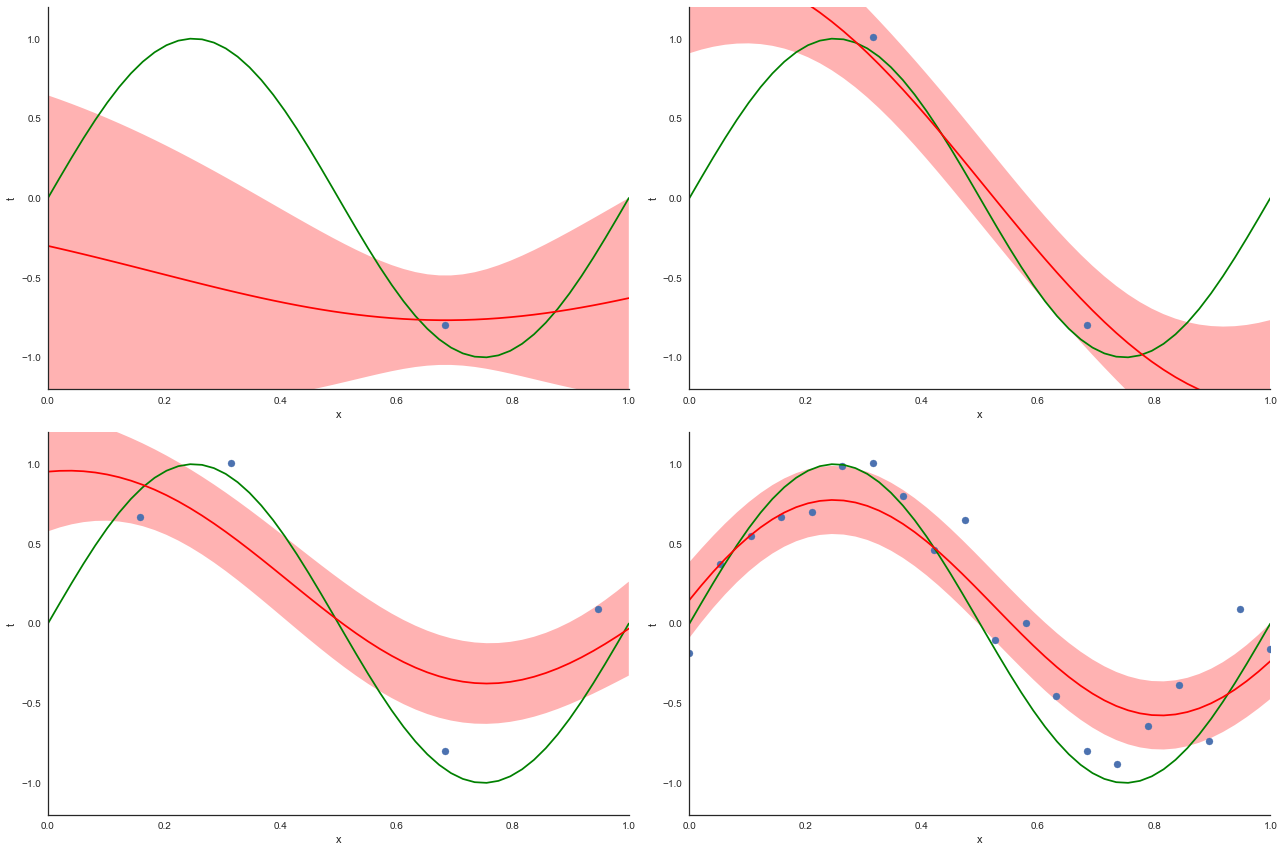

In [11]:
# Plot
fig, axarr = plt.subplots(nrows=2, ncols=2, figsize=[18, 12])

plot_ground_truth(axarr[0, 0])
_, predictive_mean = plot_predictive_mean(x[:1], gp_covariance(x[:1]), t[:1], axarr[0, 0])
plot_predictive_stdev(x[:1], gp_covariance(x[:1]), predictive_mean, axarr[0, 0])
plot_data(1, axarr[0, 0])
axarr[0, 0].set_ylim([-1.2, 1.2])
axarr[0, 0].set_xlim([0, 1])
axarr[0, 0].set_ylabel('t')
axarr[0, 0].set_xlabel('x')

plot_ground_truth(axarr[0, 1])
_, predictive_mean = plot_predictive_mean(x[:2], gp_covariance(x[:2]), t[:2], axarr[0, 1])
plot_predictive_stdev(x[:2], gp_covariance(x[:2]), predictive_mean, axarr[0, 1])
plot_data(2, axarr[0, 1])
axarr[0, 1].set_ylim([-1.2, 1.2])
axarr[0, 1].set_xlim([0, 1])
axarr[0, 1].set_ylabel('t')
axarr[0, 1].set_xlabel('x')

plot_ground_truth(axarr[1, 0])
_, predictive_mean = plot_predictive_mean(x[:4], gp_covariance(x[:4]), t[:4], axarr[1, 0])
plot_predictive_stdev(x[:4], gp_covariance(x[:4]), predictive_mean, axarr[1, 0])
plot_data(4, axarr[1, 0])
axarr[1, 0].set_ylim([-1.2, 1.2])
axarr[1, 0].set_xlim([0, 1])
axarr[1, 0].set_ylabel('t')
axarr[1, 0].set_xlabel('x')

plot_ground_truth(axarr[1, 1])
_, predictive_mean = plot_predictive_mean(x, gp_covariance(x), t, axarr[1, 1])
plot_predictive_stdev(x, gp_covariance(x), predictive_mean, axarr[1, 1])
plot_data(20, axarr[1, 1])
axarr[1, 1].set_ylim([-1.2, 1.2])
axarr[1, 1].set_xlim([0, 1])
axarr[1, 1].set_ylabel('t')
axarr[1, 1].set_xlabel('x')

plt.tight_layout()
sns.despine()
plt.show()